**PREDICTING THE LENGTH OF STAY OF A PATIENT IN A HOSPITAL**

**NAME: MEGHNA GHOSAL (RA1811033010020)**


In [2]:
import os
from operator import itemgetter    
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.float` is a deprecated alias')
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.int` is a deprecated alias')

In [3]:
df = pd.read_csv(r'C:\Users\Meghna\OneDrive\Desktop\MIMIC.csv')
df.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1


In [4]:
## Dropping unnecesary columns

df.drop(['LOSdays', 'ExpiredHospital','AdmitDiagnosis','AdmitProcedure','marital_status','ethnicity','religion','insurance','hadm_id','gender'], axis = 1, inplace=True)

In [5]:
## Separating independent and dependend variables

y = df['LOSgroupNum']

In [6]:
X = df.drop('LOSgroupNum', 1)

In [7]:
print(X.columns)

Index(['age', 'admit_type', 'admit_location', 'NumCallouts', 'NumDiagnosis',
       'NumProcs', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


In [8]:
# One hot encoding

category = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]

for c in category:
    if c in X.columns:
        oneh = pd.get_dummies(X[c])
        X = X.drop(c, axis=1)
        X = X.join(oneh, lsuffix='_left', rsuffix='_right')
        
X.head()
print(X.shape)

(58976, 28)


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [10]:
## train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [11]:
# Feature selection

s = SelectKBest(score_func=chi2, k=16)
best= s.fit_transform(X,y)

In [12]:
print(best.shape)

(58976, 16)


In [13]:
b=s.get_support()
x_new= X[X.columns[b]]
x_new.head()

,age,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,NEWBORN
0,35,0.16,2.59,0.00,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,493.89,0
1,59,0.25,2.23,0.99,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,465.71,0
2,48,0.00,0.75,0.17,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,344.00,0
3,73,0.41,0.69,0.27,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,603.05,0
4,60,0.00,3.69,0.82,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,679.84,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=7)
print(X_train.shape)
print(y_train.shape)

(47180, 16)
(47180,)


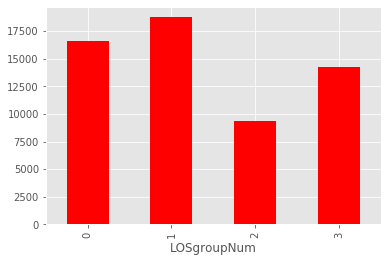

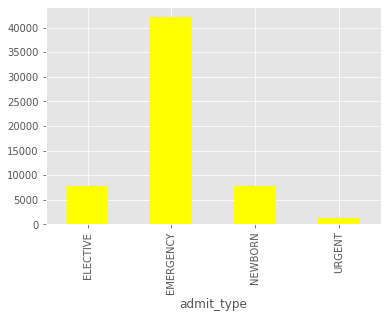

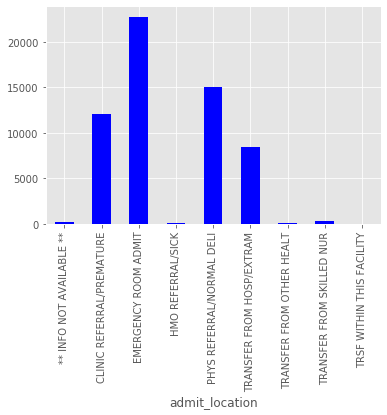

In [15]:
## Data Visualization

df.groupby('LOSgroupNum').size().plot.bar(color='red')
plt.show()
df.groupby('admit_type').size().plot.bar(color='yellow')
plt.show()
df.groupby('admit_location').size().plot.bar(color='blue')
plt.show()

In [16]:
## Random Forest

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RFclassifier= RandomForestClassifier().fit(X_train, y_train)
yhat3= RFclassifier.predict(X_test)
print("Train:",accuracy_score(y_train,RFclassifier.predict(X_train)))
print("Test:",accuracy_score(y_test,yhat3))

Train: 0.994616362865621
Test: 0.9008138351983723


In [17]:
# Logistic Regression

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred=logreg.predict(X_test)
print("Train:",metrics.accuracy_score(y_train,logreg.predict(X_train)))
print("Test:",metrics.accuracy_score(y_test,pred))

Train: 0.7253497244595167
Test: 0.7184638860630722


In [18]:
#Decison Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train,y_train)
yhat2=dt.predict(X_test)
print("Train:",accuracy_score(y_train,dt.predict(X_train)))
print("Test:",accuracy_score(y_test,yhat2))

Train: 0.7450614667231877
Test: 0.7420311970159376


In [19]:
# KNN

from sklearn import metrics
n1=KNeighborsClassifier(n_neighbors=9).fit(X_train,y_train)
yhat1=n1.predict(X_test)
print("Train:",metrics.accuracy_score(y_train,n1.predict(X_train)))
print("Test:",metrics.accuracy_score(y_test,yhat1))

Train: 0.6146672318779144
Test: 0.5053407934893184


In [20]:
# Hyper Parameter Tuning using Grid search

scoring='accuracy'
model = RandomForestClassifier()

para = [{},]

grid_search = GridSearchCV(model, para, cv=5, scoring=scoring)
grid_search.fit(X, y)

print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RFclassifier= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(X_train, y_train)
yhat3= RFclassifier.predict(X_test)
print("Train:",accuracy_score(y_train,RFclassifier.predict(X_train)))
print("Test:",accuracy_score(y_test,yhat3))

Train: 0.9947859262399322
Test: 0.8998813157002373
